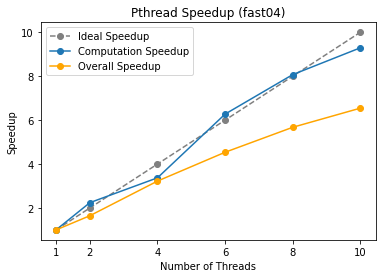

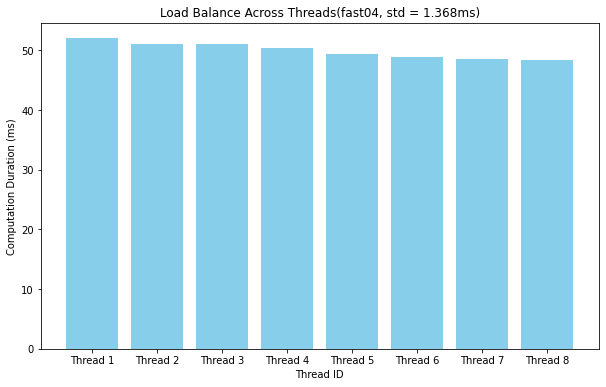

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 數據提取自表格
data = {
    "Threads": [1, 2, 4, 6, 8, 10],
    "Overall_Time": [352.877-42.712, 230.139-41.728, 138-41.789, 110-41.638, 97.764-43.096, 90.126-42.733],  # ms
    "Computation_Time": [402.316, 179.529, 119.294, 64.122, 49.84, 43.295]  # ms based on provided %
}

# 創建 DataFrame
df = pd.DataFrame(data)

# 計算理想加速比 (隨執行緒數的增長而線性增長)
df['Ideal_Speedup'] = df['Threads']

# 計算實際計算速度增長 (Computation Speedup) 和總體速度增長 (Overall Speedup)
df['Computation_Speedup'] = df['Computation_Time'][0] / df['Computation_Time']
df['Overall_Speedup'] = df['Overall_Time'][0] / df['Overall_Time']

# 畫圖
# plt.figure(figsize=(12, 6))
plt.plot(df['Threads'], df['Ideal_Speedup'], label='Ideal Speedup', linestyle='--', marker='o', color = 'gray')
plt.plot(df['Threads'], df['Computation_Speedup'], label='Computation Speedup', marker='o')
plt.plot(df['Threads'], df['Overall_Speedup'], label='Overall Speedup', color='orange',marker='o')

# 標籤和標題
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Pthread Speedup (fast04)')
plt.legend()
# plt.grid(True)
plt.xticks(df['Threads'])

# 顯示圖表
plt.show()

# load balance
# 每個 thread 的計算時間 (以 ms 為單位)
durations = [52.063, 51.078, 51.146, 50.476, 49.433, 48.917, 48.532, 48.419]
thread_ids = [f'Thread {i+1}' for i in range(len(durations))]

# 繪製條形圖
plt.figure(figsize=(10, 6))
plt.bar(thread_ids, durations, color='skyblue')

# 添加圖標題和軸標籤
plt.title("Load Balance Across Threads(fast04, std = 1.368ms)")
plt.xlabel("Thread ID")
plt.ylabel("Computation Duration (ms)")

# 顯示圖表
plt.show()



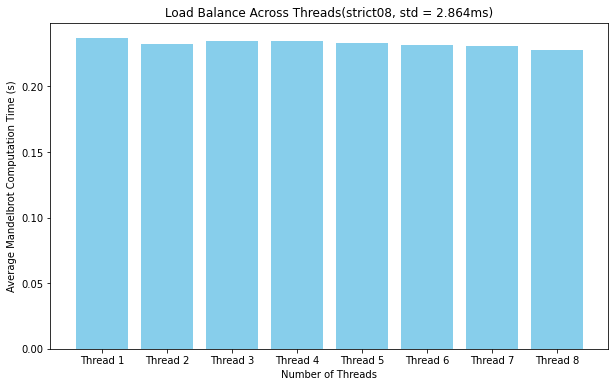

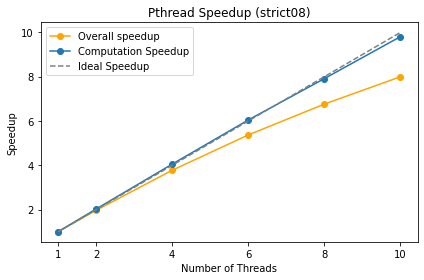

In [2]:
# 2a strict08
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from your tables
num_threads = [1, 2, 4, 6, 8, 10]
mandelbrot_times = [1.844, 0.910, 0.455, 0.305, 0.233, 0.188]  # In seconds
total_times = [1.896, 0.964, 0.50186, 0.352988, 0.280306, 0.237052]  # Overall execution time in seconds

# Plot 1: Load Balance (Mandelbrot Computation Times)
durations = [0.236725, 0.2324171, 0.234853, 0.2342934, 0.2331487, 0.2317005, 0.2305762, 0.2273823]
plt.figure(figsize=(10, 6))
plt.bar([f'Thread {i+1}' for i in range(len(durations))], durations, color='skyblue')
plt.xlabel('Number of Threads')
plt.ylabel('Average Mandelbrot Computation Time (s)')
plt.title('Load Balance Across Threads(strict08, std = 2.864ms)')
plt.show()

# Plot 2: Speedup
overall_speedup = total_times[0]/np.array(total_times)
Computation_speedup = mandelbrot_times[0]/np.array(mandelbrot_times)
# plt.subplot(1, 2, 2)
plt.plot(num_threads, overall_speedup, marker='o', color='orange', label='Overall speedup')
plt.plot(num_threads, Computation_speedup, marker='o', label='Computation Speedup')
ideal_speedup = num_threads
plt.plot(num_threads, ideal_speedup, linestyle='--', color='gray', label='Ideal Speedup')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Pthread Speedup (strict08)')
plt.legend()
plt.xticks(num_threads)

plt.tight_layout()
plt.show()


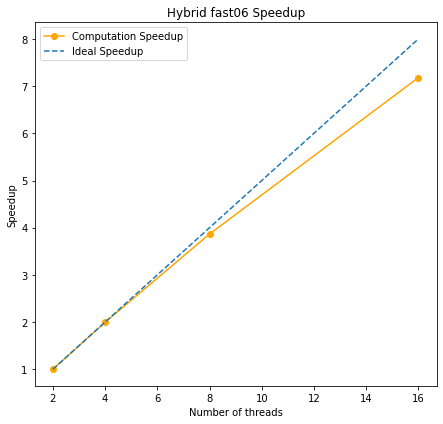

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Given data for each configuration in milliseconds
times_data = {
    "n2c1": {"overall": 599.507, "computation": 317.114},
    "n2c2": {"overall": 443.996, "computation": 158.885},
    "n2c4": {"overall": 329.206, "computation": 82.037},
    "n2c8": {"overall": 332.527, "computation": 44.164},
}

# Baseline values for single-threaded execution (n=1, c=1) in milliseconds
baseline_overall = 599.507  # Assuming n2c1 overall as single-threaded baseline
baseline_computation = 317.114  # Assuming n2c1 computation as single-threaded baseline

# Calculating speedups
configurations = list(times_data.keys())
overall_speedup = [baseline_overall / times_data[config]["overall"] for config in configurations]
computation_speedup = [baseline_computation / times_data[config]["computation"] for config in configurations]

# Plotting the results
x = [2, 4, 8, 16]

plt.figure(figsize=(12, 6))

# Plot Overall Speedup
plt.subplot(1, 2, 1)
# plt.plot(x, overall_speedup, marker='o', label="Overall Speedup")
plt.plot(x, computation_speedup, marker='o', color='orange', label="Computation Speedup")
plt.plot(x, [1, 2, 4, 8], linestyle="--", label="Ideal Speedup")  # Ideal speedup line
# plt.xticks(x, configurations)
plt.xlabel("Number of threads")
plt.ylabel("Speedup")
plt.title("Hybrid fast06 Speedup")
plt.legend()

# Plot Computation Speedup
# plt.subplot(1, 2, 2)
# plt.plot(x, computation_speedup, marker='o', color='orange', label="Computation Speedup")
# plt.plot(x, [1, 2, 4, 8], linestyle="--", label="Ideal Speedup")  # Ideal speedup line
# # plt.xticks(x, configurations)
# plt.xlabel("Configuration")
# plt.ylabel("Speedup")
# plt.title("Computation Speedup")
# plt.legend()

plt.tight_layout()
plt.show()


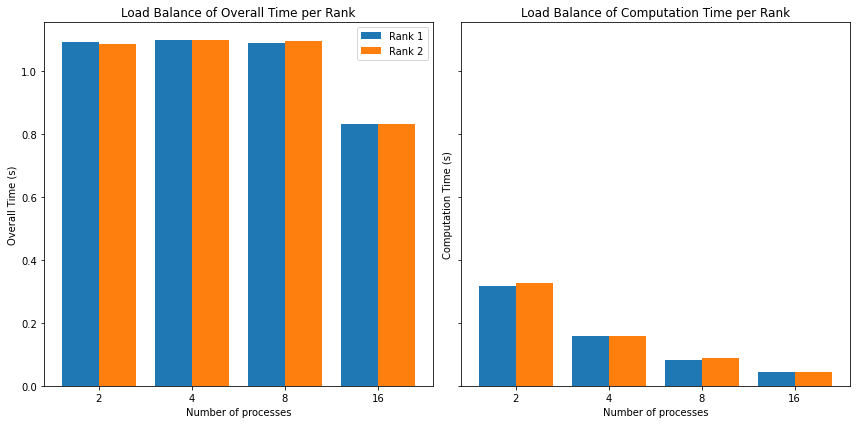

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for each configuration
configurations = ["n2c1", "n2c2", "n2c4", "n2c8"]
main_times = {
    "n2c1": [1.095, 1.086],
    "n2c2": [1.100, 1.101],
    "n2c4": [1.089, 1.096],
    "n2c8": [0.833, 0.834]
}
computation_times = {
    "n2c1": [0.317, 0.327],
    "n2c2": [0.158, 0.15987],
    "n2c4": [0.082, 0.087],
    "n2c8": [0.044, 0.045]
}

# Set up the plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Colors for bars
colors = ['#1f77b4', '#ff7f0e']

# Plot Main Times for Load Balance
for i, config in enumerate(configurations):
    ax[0].bar(i - 0.2, main_times[config][0], width=0.4, color=colors[0], label='Rank 1' if i == 0 else "")
    ax[0].bar(i + 0.2, main_times[config][1], width=0.4, color=colors[1], label='Rank 2' if i == 0 else "")

# Labels and title for Main Time
ax[0].set_xticks(range(len(configurations)))
ax[0].set_xlabel("Number of processes")
ax[0].set_xticklabels([2, 4, 8, 16])
ax[0].set_ylabel("Overall Time (s)")
ax[0].set_title("Load Balance of Overall Time per Rank")
ax[0].legend()

# Plot Computation Times for Load Balance
for i, config in enumerate(configurations):
    ax[1].bar(i - 0.2, computation_times[config][0], width=0.4, color=colors[0], label='Rank 1' if i == 0 else "")
    ax[1].bar(i + 0.2, computation_times[config][1], width=0.4, color=colors[1], label='Rank 2' if i == 0 else "")

# Labels and title for Computation Time
ax[1].set_xticks(range(len(configurations)))
ax[1].set_xticklabels([2, 4, 8, 16])
ax[1].set_xlabel("Number of processes")
ax[1].set_ylabel("Computation Time (s)")
ax[1].set_title("Load Balance of Computation Time per Rank")

plt.tight_layout()
plt.show()


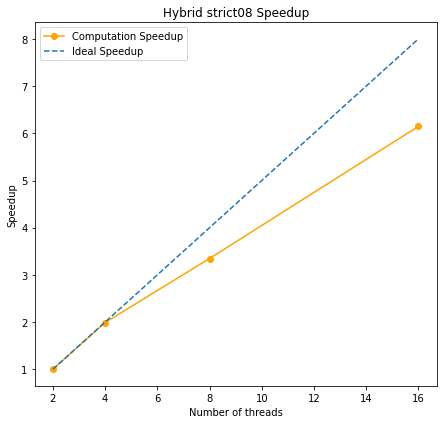

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Given data for each configuration in milliseconds
times_data = {
    "n2c1": {"overall": 2597, "computation": 1918},
    "n2c2": {"overall": 1617, "computation": 964},
    "n2c4": {"overall": 1336, "computation": 573},
    "n2c8": {"overall": 1076, "computation": 312},
}

# Baseline values for single-threaded execution (n=1, c=1) in milliseconds
baseline_overall = 2597  # Assuming n2c1 overall as single-threaded baseline
baseline_computation = 1918  # Assuming n2c1 computation as single-threaded baseline

# Calculating speedups
configurations = list(times_data.keys())
overall_speedup = [baseline_overall / times_data[config]["overall"] for config in configurations]
computation_speedup = [baseline_computation / times_data[config]["computation"] for config in configurations]

# Plotting the results
x = [2, 4, 8, 16]

plt.figure(figsize=(12, 6))

# Plot Overall Speedup
plt.subplot(1, 2, 1)
# plt.plot(x, overall_speedup, marker='o', label="Overall Speedup")
plt.plot(x, computation_speedup, marker='o', color='orange', label="Computation Speedup")
plt.plot(x, [1, 2, 4, 8], linestyle="--", label="Ideal Speedup")  # Ideal speedup line
# plt.xticks(x, configurations)
plt.xlabel("Number of threads")
plt.ylabel("Speedup")
plt.title("Hybrid strict08 Speedup")
plt.legend()

plt.tight_layout()
plt.show()


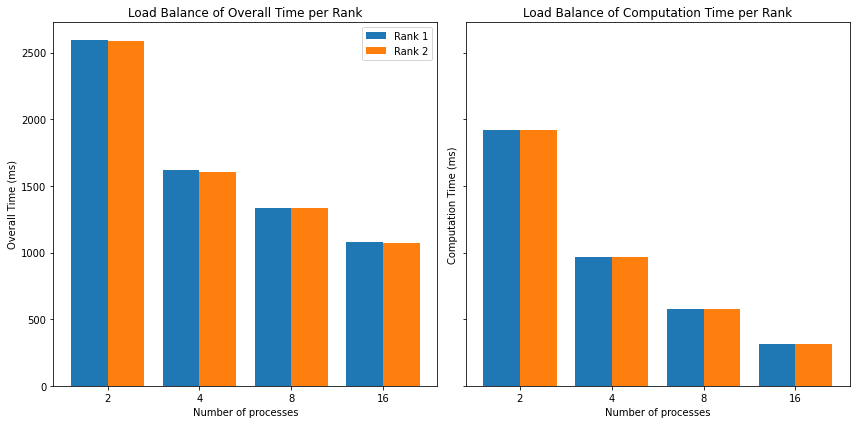

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for each configuration
configurations = ["n2c1", "n2c2", "n2c4", "n2c8"]
main_times = {
    "n2c1": [2597, 2590],
    "n2c2": [1617, 1605],
    "n2c4": [1337, 1336],
    "n2c8": [1076, 1071]
}
computation_times = {
    "n2c1": [1918, 1919],
    "n2c2": [963, 964],
    "n2c4": [574, 573],
    "n2c8": [315.370, 315.327]
}

# Set up the plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Colors for bars
colors = ['#1f77b4', '#ff7f0e']

# Plot Main Times for Load Balance
for i, config in enumerate(configurations):
    ax[0].bar(i - 0.2, main_times[config][0], width=0.4, color=colors[0], label='Rank 1' if i == 0 else "")
    ax[0].bar(i + 0.2, main_times[config][1], width=0.4, color=colors[1], label='Rank 2' if i == 0 else "")

# Labels and title for Main Time
ax[0].set_xticks(range(len(configurations)))
ax[0].set_xlabel("Number of processes")
ax[0].set_xticklabels([2, 4, 8, 16])
ax[0].set_ylabel("Overall Time (ms)")
ax[0].set_title("Load Balance of Overall Time per Rank")
ax[0].legend()

# Plot Computation Times for Load Balance
for i, config in enumerate(configurations):
    ax[1].bar(i - 0.2, computation_times[config][0], width=0.4, color=colors[0], label='Rank 1' if i == 0 else "")
    ax[1].bar(i + 0.2, computation_times[config][1], width=0.4, color=colors[1], label='Rank 2' if i == 0 else "")

# Labels and title for Computation Time
ax[1].set_xticks(range(len(configurations)))
ax[1].set_xticklabels([2, 4, 8, 16])
ax[1].set_xlabel("Number of processes")
ax[1].set_ylabel("Computation Time (ms)")
ax[1].set_title("Load Balance of Computation Time per Rank")

plt.tight_layout()
plt.show()


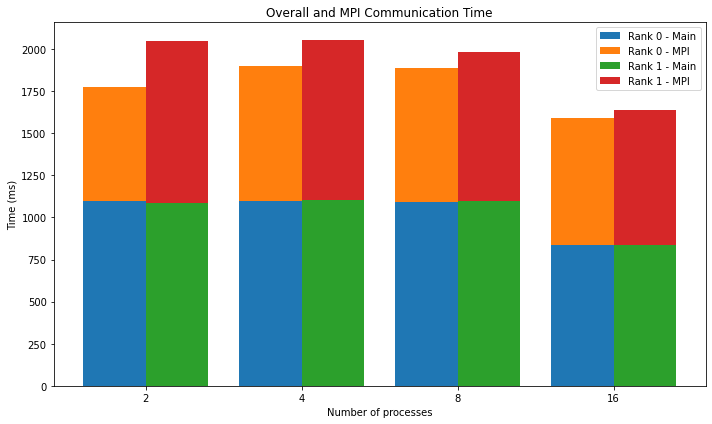

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each configuration and rank
configurations = ['n2c1', 'n2c2', 'n2c4', 'n2c8']
ranks = ['Rank 0', 'Rank 1']

# Main and MPI times (in ms) for each rank in each configuration
main_times = {
    'n2c1': [1095, 1086],
    'n2c2': [1100, 1101],
    'n2c4': [1089, 1096],
    'n2c8': [833.36, 833.891]
}
mpi_times = {
    'n2c1': [674.429 + 0.571616 + 2.788, 666.737 + 292.073 + 2.788],
    'n2c2': [792.914 + 0.525257 + 3.13, 794.942 + 145.402 + 13.996],
    'n2c4': [794.121 + 0.516631 + 2.716, 798.847 + 74.526 + 13.689],
    'n2c8': [756.559 + 0.498702 + 2.923, 756.781 + 34.773 + 13.261]
}

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.4  # Width of the bars

# x locations for each group
x = np.arange(len(configurations))

# Plot each rank as stacked bars
for i, rank in enumerate(ranks):
    main_values = [main_times[config][i] for config in configurations]
    mpi_values = [mpi_times[config][i] for config in configurations]
    
    # Plot main and MPI as stacked bars
    ax.bar(x + i * width, main_values, width, label=f'{rank} - Main')
    ax.bar(x + i * width, mpi_values, width, label=f'{rank} - MPI', bottom=main_values)

# Labeling
ax.set_xlabel('Number of processes')
ax.set_ylabel('Time (ms)')
ax.set_title('Overall and MPI Communication Time')
ax.set_xticks(x + width / 2)
ax.set_xticklabels([2, 4, 8, 16])
ax.legend()

plt.tight_layout()
plt.show()
